- [ ] Import data
- [ ] Make into binary, based on a threshold
- [ ] Find the brighest row and column, i.e. the galaxu of our pixture. Might be able to use blob from skimage
- [ ] Rotate using some sort of PC(A?) to make it easier for our model to handle later. 
- [ ] Resise somewhere along this list to a format we choose. 

# preprocesing
- [ ] Check each image and check how many "blobs" they have. 
- [ ] Remove them 
- [ ] Check how many we have left.  

In [206]:
import skimage as ski
import numpy as np

In [207]:
img = ski.io.imread("/data/notebook_files/train_folder1/101718.jpg")

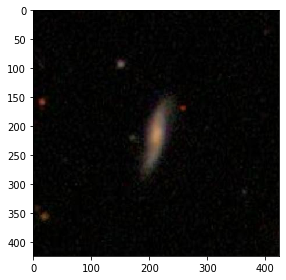

In [208]:
ski.io.imshow(img)

In [209]:
# Ignores colours, as that is mostly a factor of length and the shape of the galaxy is what we are aiming for. 
gray_img = ski.color.rgb2gray(img)

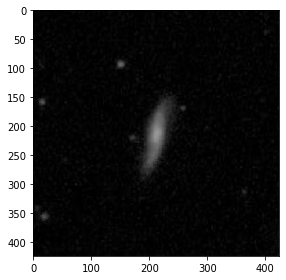

In [210]:
ski.io.imshow(gray_img)

In [211]:
blobs = ski.feature.blob_doh(gray_img, threshold=0.001)
blobs

array([[212. , 212. , 30. ],
 [ 92. , 150. , 7.44444444],
 [157. , 14. , 7.44444444],
 [355. , 18. , 7.44444444],
 [168. , 258. , 4.22222222]])

In [212]:
galaxy = None
max_sigma = 0
for b in blobs:
    if b[2] > max_sigma:
        max_sigma = b[2]
        galaxy = b

x_point_of_interest = galaxy[0]
y_point_of_interest = galaxy[1]
sigma = galaxy[2]
cropped_img = gray_img[int(x_point_of_interest-sigma*2):int(x_point_of_interest+sigma*2), int(y_point_of_interest-sigma*2):int(y_point_of_interest+sigma*2)]

In [213]:
sigma

30.0

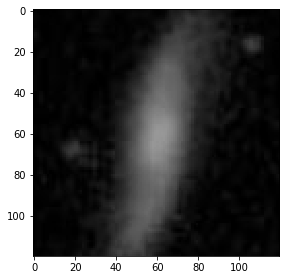

In [214]:
ski.io.imshow(cropped_img)

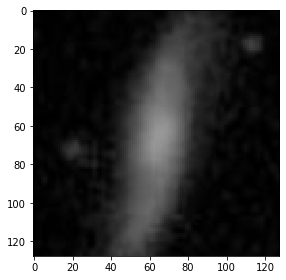

In [215]:
resized_image = ski.transform.resize(cropped_img, (128, 128))
ski.io.imshow(resized_image)

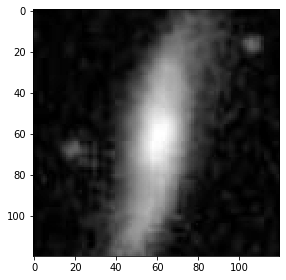

In [216]:
# Ignores active and unactive galaxies, to a large extent. 
exposed_img = ski.exposure.rescale_intensity(cropped_img)
ski.io.imshow(exposed_img)

In [217]:
ski.feature.structure_tensor_eigenvalues(exposed_img) 

array([[0.01648684, 0.00988444, 0.00328205, 0.00140301, 0.00140301,
 0.00140301, 0.00140301, 0.00140301, 0. , 0. ,
 0. , 0.00660239, 0.01320479, 0.01980718, 0.02640958,
 0.03301197, 0.03961437, 0.03961437, 0.03301197, 0.02640958,
 0.02640958, 0.01980718, 0.01320479, 0.01320479, 0.05281916,
 0.04621676, 0.03301197, 0.01980718, 0.01980718, 0.02640958,
 0.03301197, 0.04621676, 0.06602395, 0.07262634, 0.07922873,
 0.07922873, 0.07262634, 0.05281916, 0.03301197, 0.02640958,
 0.03396404, 0.03396404, 0.02736164, 0.02736164, 0.02359036,
 0.03019275, 0.03679514, 0.03679514, 0.05047597, 0.04387357,
 0.04387357, 0.03727118, 0.03822324, 0.04482564, 0.04482564,
 0.04810769, 0.05279275, 0.04287001, 0.02306282, 0.01458139,
 0.01175028, 0.01362932, 0.01975568, 0.03012937, 0.04993655,
 0.09520125, 0.15367073, 0.1772492 , 0.17064681, 0.16404442,
 0.1772492 , 0.19658036, 0.19562829, 0.22203787, 0.24184505,
 0.22864026, 0.19329831, 0.17253906, 0.18574385, 0.20555103,
 0.22535821, 0.238563 , 0.25837019, 0.25837019, 0.238563 ,
 0.20555103, 0.16688873, 0.14047915, 0.14804681, 0.14144442,
 0.12823963, 0.12163724, 0.11126355, 0.11126355, 0.11126355,
 0.11786595, 0.0919324 , 0.06552282, 0.03346292, 0.02025813,
 0.0117384 , 0.0117384 , 0.0117384 , 0.00752937, 0.00612636,
 0.00612636, 0.00612636, 0.00612636, 0.00752937, 0.01365573,
 0.02025813, 0.02686052, 0.00561204, 0.0117384 , 0.02494319,
 0.03814798, 0.04143003, 0.04143003, 0.03482763, 0.03814798]])

In [218]:
def covariance_matrix(image, x_size, y_size):
    sum_rows = [0]*x_size
    sum_columns = [0]*y_size
    for index_row in range(0, x_size):
        sum_rows[index_row] = sum(image[index_row])
        for index_column in range(0, y_size):
            sum_columns[index_column] += image[index_row][index_column]
    cov_matrix = np.cov(sum_rows, y=sum_columns)
    return  cov_matrix

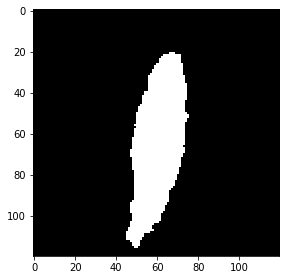

In [219]:
ski.io.imshow(ski.util.img_as_bool(exposed_img))

In [220]:
cov_matrix = covariance_matrix(ski.util.img_as_bool(resized_image), 128, 128)

In [221]:
result = np.linalg.eig(cov_matrix)
result

(array([ 6.78652338, 68.37575516]),
 array([[-0.85335069, -0.52133732],
        [ 0.52133732, -0.85335069]]))

In [226]:
rotations_in_pi = np.arccos(result[1][1][0]+result[1][1][1] / 2)
rotations_in_pi

1.4759923969011361

In [228]:
angle = np.degrees(rotations_in_pi)
angle

84.56813493583338

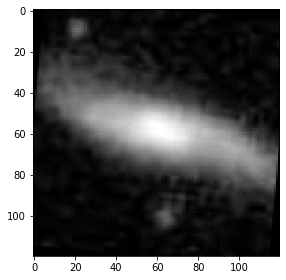

In [229]:
ski.io.imshow(ski.transform.rotate(exposed_img, np.rad2deg(rotations_in_pi)))

In [225]:
cov_matrix

array([[23.52602116, 27.40003691],
 [27.40003691, 51.63625738]])